<a href="https://colab.research.google.com/github/toot09/Python-Data_Analysis-and-Image-Processing-Tutorial/blob/master/14.%20OpenCV%20Contours%20%EC%B2%98%EB%A6%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
import cv2
import matplotlib.pyplot as plt
import numpy as np

uploaded = files.upload()

Saving digit_image.png to digit_image.png


cv2.boundingRect(contour): Contour를 포함하는 사각형을 그립니다.

 * 사각형의 X, Y 좌표와 너비, 높이를 반환합니다

<function matplotlib.pyplot.show>

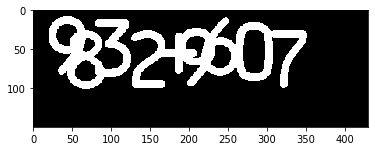

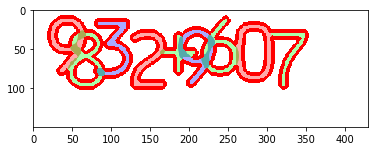

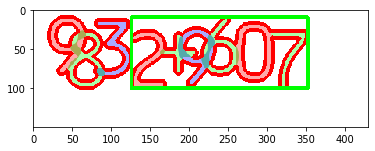

In [3]:
image = cv2.imread("digit_image.png")
image_gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
_, thre = cv2.threshold(image_gray,230,255,0)
#plt.imshow(cv2.cvtColor(thre,cv2.COLOR_BGR2RGB))

# bit비교 (백:1 흑:0)
# 1) cv2.bitwise_and
# 2) cv2.bitwise_or
# 3) cv2.bitwise_not -> 반전
# 4) cv2.bitwise_xor
thre = cv2.bitwise_not(thre)

#contour,_ = cv2.findContours(thre,cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contour,hierarchy = cv2.findContours(thre,cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
image = cv2.drawContours(image, contour, -1, (0,0,255),4 )

plt.figure(1)
plt.imshow(cv2.cvtColor(thre,cv2.COLOR_BGR2RGB))
plt.show

plt.figure(2)
plt.imshow(cv2.cvtColor(image,cv2.COLOR_BGR2RGB))
plt.show

cnt = contour[0]
x,y,w,h = cv2.boundingRect(cnt)
image = cv2.rectangle(image,(x,y),(x+w,y+h),(0,255,0),3)

plt.figure(3)
plt.imshow(cv2.cvtColor(image,cv2.COLOR_BGR2RGB))
plt.show

cv2.convexHull(contour): Convex Hull 알고리즘으로 외곽을 구하는 함수

 * 대략적인 형태의 Contour 외곽을 빠르게 구할 수 있습니다. (단일 Contour 반환)

<function matplotlib.pyplot.show>

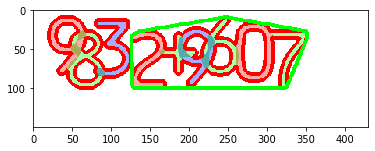

In [5]:
#cv2.findContours(thre,cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
img = cv2.imread("digit_image.png")
img_gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

_,thre = cv2.threshold(img_gray,230,255,0)
thre = cv2.bitwise_not(thre)

contour, hierarchy= cv2.findContours(thre, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
img = cv2.drawContours(img, contour,-1,(0,0,255),3)

hull = cv2.convexHull(contour[0])
img = cv2.drawContours(img, [hull], -1, (0,255,0), 3)

plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show


cv2.approxPolyDP(curve, epsilon, closed): 근사치 Contour를 구합니다.

 1. curve: Contour
 2. epsilon: 최대 거리 (클수록 Point 개수 감소)
 3. closed: 폐곡선 여부


cv2.arcLength(cnt, closed=True/False) : OpenCV에서 컨투어 둘레를 구하는 함수
  1. cnt : contour 정보
  2. closed : 폐곡선 여부, True이면 컨투어의 시작과 끝점을 이어 도형을 구성하고 둘레의 값 계산, Flase인 경우 시작과 끝 점을 잇지 않고 둘레 계산


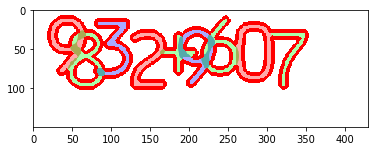

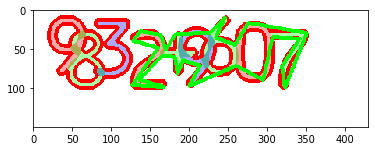

In [12]:
image = cv2.imread("digit_image.png")
image_gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
_, thre = cv2.threshold(image_gray,230,255,0)
thre = cv2.bitwise_not(thre)

contour, hierarchy = cv2.findContours(thre,cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
image = cv2.drawContours(image,contour,-1,(0,0,255),3)
plt.figure(1)
plt.imshow(cv2.cvtColor(image,cv2.COLOR_BGR2RGB))
plt.show()

cont = contour[0]
epsilon = 0.01 * cv2.arcLength(cont,True)
approx = cv2.approxPolyDP(cont,epsilon,True)
image = cv2.drawContours(image,[approx],-1,(0,255,0),3)
plt.figure(2)
plt.imshow(cv2.cvtColor(image,cv2.COLOR_BGR2RGB))
plt.show()


cv2.contourArea(contour): Contour의 면적을 구합니다.

cv2.arcLength(contour): Contour의 둘레를 구합니다.

cv2.moments(contour): Contour의 특징을 추출합니다.

9637.5
1112.1046812534332
{'m00': 9637.5, 'm10': 2328654.1666666665, 'm01': 525860.6666666666, 'm20': 592439950.25, 'm11': 125395340.54166666, 'm02': 32616659.75, 'm30': 157199366984.05002, 'm21': 31597487112.5, 'm12': 7677332730.433333, 'm03': 2223038890.5, 'mu20': 29780523.227014065, 'mu11': -1665373.5978347063, 'mu02': 3923591.96819859, 'mu30': -339915780.7390442, 'mu21': 76375946.41720533, 'mu12': -21905836.49518633, 'mu03': 15169233.760740757, 'nu20': 0.3206295471760697, 'nu11': -0.01793010748946005, 'nu02': 0.04224302932750429, 'nu30': -0.03727866486560947, 'nu21': 0.008376172780476334, 'nu12': -0.0024024196097321344, 'nu03': 0.001663614382378067}


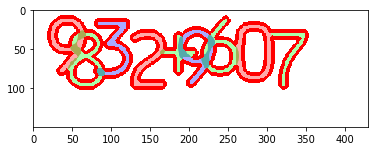

In [15]:
import cv2
import matplotlib.pyplot as plt

image = cv2.imread('digit_image.png')
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(image_gray, 230, 255, 0)
thresh = cv2.bitwise_not(thresh)

contours, _ = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
image = cv2.drawContours(image, contours, -1, (0, 0, 255), 4)

contour = contours[0]
area = cv2.contourArea(contour)
print(area)

length = cv2.arcLength(contour, True)
print(length)

M = cv2.moments(contour)
print(M)

plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()